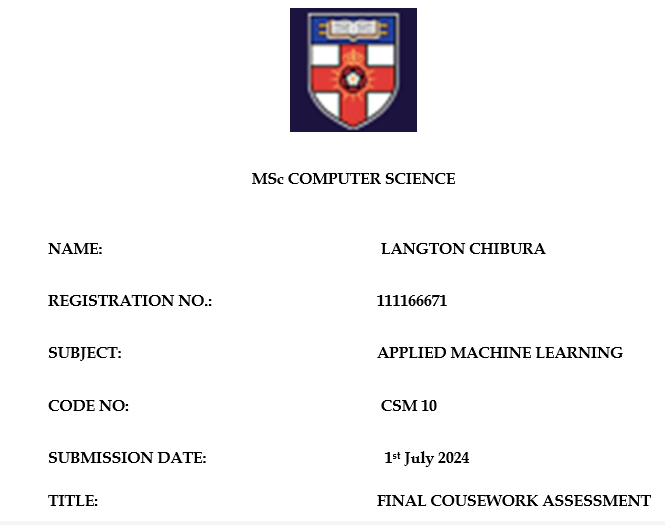

**COURSEWORK REPORT**

**Introduction**

This document is a condensed report leading to a submission in satisfaction of the requirements of the implementation of machine learning techniques to  a real- world machine learning problem. The data set was obtained for https://archive.ics.uci.edu/. The data focuses on the risk of maternal health in rural and remote areas in Bangladesh in particular and any developing part of the world in general. The problem is a classification problem, where a risk factor is used to determine the level of maternal risk. 
The data is then prepared for machine learning using various techniques to select features relevant to predicting the risk level of a patient using various feature selection and extraction techniques as well as sampling to increase the computational speed of the process as well as removing irrelevant data. Since input variables are provided and the expected outcome is also available supervised classifiers were be used. The output is categorical hence supervised classification models like Logistic Regression, Decision Tree, K-Nearest Neighbors and Random Forest were implemented to generate a solution.
The models are measured by their individual performances on the data basing on their predictive performances on the data, as well as against other models using the KFold validation technique. A candidate model is then used to predict the data and forms the basis of the solution to the problem.


**The Maternal Health Data set**

The narrative below summarized the Maternal Health Risk data set in terms of why the writer selected it and Its usefulness to society. Data characteristics are also explored in terms of skewedness, missing values, and other undesirable characteristics. The data is then prepared for use in a model.

**Choosing the data set**

**Rationale for the choice of data set.**

Developing parts of the world are experiencing high maternal mortality rates especially in rural and remote areas mainly in rural and remote parts for the world, for example in Africa (Ahmed et al,2020). If early warning signs like high blood pressure and high heart rates are be detected using technology, prompt medical processes can be initiated to save the life of the pregnant mother. Awareness on the part of the pregnant mother can be initiated so that they tale steps like being close to health facilities since in developing countries access to medical facilities is both scarce and far, distance wise. The high maternal rates are so worrisome that they are a cause of concern for the United Nations as well (Ahmed et al, 2020)
This dataset offers a possible solution for such a global problem since it assists in early medical diagnoses and prompt action on the part of pregnant women in the world in general and in developing 

**SECTION A: DATA VISUALISATION**

In [780]:
#Analysing the data
#Loading the data frr analysis
#The data was placed in the Desktop directory and then analyzed
import pandas as pd

In [781]:
maternityRisk = pd.read_csv("C:/Users/Langton/OneDrive/Desktop/Maternal Health Risk Data Set.csv")

In [782]:
#Exploring the structure of the data
maternityRisk

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk
...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,high risk
1010,55,120,90,18.0,98.0,60,high risk
1011,35,85,60,19.0,98.0,86,high risk
1012,43,120,90,18.0,98.0,70,high risk


The structure of the data shows that there are 7 columns and 1014 rows. The expected outcome(y variable) is the level of maternity risk and the 6 features are used to predict the maternity risk.

In [783]:
#analysing the structure of the data further using print statements
print(maternityRisk.shape)

(1014, 7)


In [784]:
#determining the nomality of the data by analysing the head and the tail using print statements
print(maternityRisk.head)

<bound method NDFrame.head of       Age  SystolicBP  DiastolicBP    BS  BodyTemp  HeartRate  RiskLevel
0      25         130           80  15.0      98.0         86  high risk
1      35         140           90  13.0      98.0         70  high risk
2      29          90           70   8.0     100.0         80  high risk
3      30         140           85   7.0      98.0         70  high risk
4      35         120           60   6.1      98.0         76   low risk
...   ...         ...          ...   ...       ...        ...        ...
1009   22         120           60  15.0      98.0         80  high risk
1010   55         120           90  18.0      98.0         60  high risk
1011   35          85           60  19.0      98.0         86  high risk
1012   43         120           90  18.0      98.0         70  high risk
1013   32         120           65   6.0     101.0         76   mid risk

[1014 rows x 7 columns]>


The data is not normalised. The first  and last 5 columns show that the data is not matched in terms of columns and the data entries.

In [785]:
#analysing the first 10 rows 
print(maternityRisk.head(10))

   Age  SystolicBP  DiastolicBP     BS  BodyTemp  HeartRate  RiskLevel
0   25         130           80  15.00      98.0         86  high risk
1   35         140           90  13.00      98.0         70  high risk
2   29          90           70   8.00     100.0         80  high risk
3   30         140           85   7.00      98.0         70  high risk
4   35         120           60   6.10      98.0         76   low risk
5   23         140           80   7.01      98.0         70  high risk
6   23         130           70   7.01      98.0         78   mid risk
7   35          85           60  11.00     102.0         86  high risk
8   32         120           90   6.90      98.0         70   mid risk
9   42         130           80  18.00      98.0         70  high risk


In [786]:
#analysing last 10 rows
print(maternityRisk.tail(10))

      Age  SystolicBP  DiastolicBP    BS  BodyTemp  HeartRate  RiskLevel
1004   13          90           65   9.0     101.0         80  high risk
1005   17          90           65   7.7     103.0         67  high risk
1006   17          85           60   6.3     102.0         86  high risk
1007   40         120           75   7.7      98.0         70  high risk
1008   48         120           80  11.0      98.0         88  high risk
1009   22         120           60  15.0      98.0         80  high risk
1010   55         120           90  18.0      98.0         60  high risk
1011   35          85           60  19.0      98.0         86  high risk
1012   43         120           90  18.0      98.0         70  high risk
1013   32         120           65   6.0     101.0         76   mid risk


In [787]:
#Checking random samples of the data to determine how the data looks like if random samples are collected and not only the first 5 consecutive 
#rows and the last 5 consecutive rows. This wiil be done 5 times
#1st check of checking 10 randomly sampled data rows
maternityRisk.sample(10)

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
834,17,90,65,7.5,103.0,67,mid risk
857,30,120,80,6.9,101.0,76,mid risk
822,23,120,80,7.5,98.0,70,mid risk
690,20,120,76,7.5,98.0,70,low risk
380,13,90,65,7.8,101.0,80,mid risk
239,25,120,90,12.0,101.0,80,high risk
440,23,140,90,6.8,98.0,70,high risk
39,35,100,70,6.1,98.0,66,low risk
610,13,90,65,7.5,101.0,80,high risk
862,17,120,80,6.7,102.0,76,mid risk


In [788]:
#2nd check of checking 10 randomly sampled data rows 
maternityRisk.sample(10)

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
965,54,140,100,15.0,98.0,66,high risk
584,32,140,90,18.0,98.0,88,high risk
212,19,120,85,7.0,98.0,60,low risk
813,29,130,70,7.5,98.0,78,mid risk
982,55,140,80,7.2,101.0,76,high risk
344,12,95,60,6.9,98.0,77,low risk
496,23,90,60,7.9,98.0,76,low risk
132,35,140,100,7.5,98.0,66,high risk
985,32,140,100,8.0,98.0,70,high risk
335,35,120,80,6.9,98.0,78,mid risk


In [789]:
#3rd check of checking 10 randomly sampled data rows 
maternityRisk.sample(10)

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
128,29,120,70,9.0,98.0,80,high risk
114,63,140,90,15.0,98.0,90,high risk
201,42,120,80,7.5,98.0,70,low risk
37,55,100,65,6.1,98.0,66,low risk
741,19,120,80,7.0,98.0,70,mid risk
689,40,160,100,19.0,98.0,77,high risk
414,27,120,90,6.8,102.0,68,mid risk
121,49,140,90,15.0,98.0,90,high risk
120,48,120,80,11.0,98.0,88,high risk
253,40,120,90,6.9,98.0,80,low risk


In [790]:
#4th check of checking 10 randomly sampled data rows 
maternityRisk.sample(10)


,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
581,16,100,70,7.5,98.0,80,low risk
672,15,100,49,6.0,99.0,77,low risk
903,32,120,90,7.9,98.0,70,low risk
864,31,120,60,6.1,98.0,76,mid risk
365,22,120,90,7.8,98.0,82,mid risk
239,25,120,90,12.0,101.0,80,high risk
947,23,120,90,7.5,98.0,60,low risk
333,22,85,60,6.9,98.0,76,mid risk
353,40,120,90,6.9,98.0,80,high risk
247,21,100,85,6.9,98.0,70,low risk


In [791]:
#fifth check of checking 10 randomly sampled data rows 
maternityRisk.sample(10)

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
635,28,85,60,9.0,101.0,86,mid risk
875,32,120,65,6.0,101.0,76,mid risk
28,49,120,90,7.2,98.0,77,low risk
843,17,90,60,9.0,102.0,86,mid risk
149,37,120,90,11.0,98.0,88,high risk
606,55,100,65,7.5,98.0,66,low risk
414,27,120,90,6.8,102.0,68,mid risk
467,50,140,90,15.0,98.0,90,high risk
869,29,90,70,6.7,98.0,80,mid risk
839,28,85,60,9.0,101.0,86,mid risk


After a quick exploration of 10 columns of data head, data tail and random samples. it is noted that the data looks good in terms the arrangment of columns and rows. The next task is to analyse the inyernal data itself to determine whether the columsn have the corredct data types for example the age columns has integers only and that there are no columns without entries.

In [792]:
#getting the information about the data and to determine the memory usage of the data
maternityRisk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


The .info() method used above shows that our data has no null values in the entries.

In [793]:
#exploring the paraneters of the dataset to confirm the data types in the dataset to identify any inconsistent values.
maternityRisk.dtypes

Age              int64
SystolicBP       int64
DiastolicBP      int64
BS             float64
BodyTemp       float64
HeartRate        int64
RiskLevel       object
dtype: object

The data frame is fairly clean with no NAN-values and the data types match the expected types, for example age is an integer and body tempetarure is a floating point number

The next task is to explore the statisctics describing the data(Descriptive Statistics) using the describe method. This gives the writer a general picture of the basic statistics surrounding the data. 

In [794]:
maternityRisk.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


The descriptive statistics for the maternityRisk data set may be used later on to compare with results from models

Checking the data type of columns is impiortant to get a feel of the values that exist in each columns

In [795]:
#checking the column 'age" to get a view of the values involved in terms of the minimum and the maximum for the first 10 columns
maternityRisk['Age'][:10]

0    25
1    35
2    29
3    30
4    35
5    23
6    23
7    35
8    32
9    42
Name: Age, dtype: int64

In [796]:
#checking the column 'age" to get a view of the values involved in terms of the minimum and the maximum for the first 10 columns
maternityRisk['SystolicBP'][:10]

0    130
1    140
2     90
3    140
4    120
5    140
6    130
7     85
8    120
9    130
Name: SystolicBP, dtype: int64

In [797]:
#checking the column 'age" to get a view of the values involved in terms of the minimum and the maximum for the first 10 columns
maternityRisk['HeartRate'][:10]

0    86
1    70
2    80
3    70
4    76
5    70
6    78
7    86
8    70
9    70
Name: HeartRate, dtype: int64

In [798]:
#Determining the columns based on index number using the iloc[]function
maternityRisk.iloc[0:,0:7]

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk
...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,high risk
1010,55,120,90,18.0,98.0,60,high risk
1011,35,85,60,19.0,98.0,86,high risk
1012,43,120,90,18.0,98.0,70,high risk


In [799]:
#Determining the rows based on index number using the iloc[]function
X = maternityRisk.iloc[0:,0:7]

In [800]:
maternityRisk.iloc[:7]

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.00,98.0,86,high risk
1,35,140,90,13.00,98.0,70,high risk
2,29,90,70,8.00,100.0,80,high risk
3,30,140,85,7.00,98.0,70,high risk
4,35,120,60,6.10,98.0,76,low risk
5,23,140,80,7.01,98.0,70,high risk
6,23,130,70,7.01,98.0,78,mid risk


In [801]:
Y = maternityRisk.iloc[:6]

Determining class distributions to ascertain the balance of the values for al atributes, given that they are not very many in this data set.

In [802]:
#Determing the classs count for feature 1: Age
class_countsAge = maternityRisk.groupby('Age').size()

In [803]:
print(class_countsAge)

Age
10     4
12    35
13    12
14     3
15    60
16    16
17    63
18    19
19    67
20    22
21    38
22    45
23    71
24     3
25    48
26     3
27     9
28    28
29    40
30    30
31    22
32    48
33     5
34     5
35    50
36     4
37     6
38     2
39     4
40    37
41     1
42    23
43     5
44     3
45     9
46     1
48    26
49     9
50    43
51     1
54    12
55    37
56     1
59     2
60    34
62     1
63     2
65     3
66     1
70     1
dtype: int64


In [804]:
# determining the class count for feature 2: SystolicBP
class_countsSystolicBP = maternityRisk.groupby('SystolicBP').size()

In [805]:
print(class_countsSystolicBP)

SystolicBP
70       7
75       8
76      16
78       3
80       5
83       2
85      43
90     154
95      12
99       2
100     92
110     19
115      8
120    449
129      1
130     60
135      3
140    120
160     10
dtype: int64


In [806]:
# determining the class count for feature 3: DiatolicBP
class_countsDiastolicBP = maternityRisk.groupby('DiastolicBP').size()

In [807]:
print(class_countsDiastolicBP)

DiastolicBP
49      25
50      24
60     174
63       8
65      87
68       2
69       1
70     100
75      38
76       3
80     226
85      49
89       1
90     153
95      36
100     87
dtype: int64


In [808]:
# determining the class count for feature 4: BS
class_countsBS = maternityRisk.groupby('BS').size()

In [809]:
print(class_countsBS)

BS
6.00      21
6.10      53
6.30       2
6.40      10
6.50       1
6.60       2
6.70      33
6.80      88
6.90     113
7.00      79
7.01      15
7.10       8
7.20      20
7.50     176
7.60       1
7.70      24
7.80      45
7.90      60
8.00      22
9.00      31
10.00      4
11.00     52
12.00     18
13.00      9
15.00     54
16.00     17
17.00      5
18.00     29
19.00     22
dtype: int64


In [810]:
# determining the class count for feature 5: Body Temp
class_countsBodyTemp = maternityRisk.groupby('BodyTemp').size()

In [811]:
print(class_countsBodyTemp)

BodyTemp
98.0     804
98.4       2
98.6       1
99.0      10
100.0     20
101.0     98
102.0     66
103.0     13
dtype: int64


In [812]:
# determining the class count for feature 6: Heart Rate
class_countsHeartRate = maternityRisk.groupby('HeartRate').size()

In [813]:
print(class_countsHeartRate)

HeartRate
7       2
60     74
65      5
66     87
67     12
68      2
70    271
75     19
76    131
77     96
78     46
80    117
82     19
86     55
88     59
90     19
dtype: int64


In [814]:
# determining the class count for feature 6: Heart Rate
class_countsRiskLevel = maternityRisk.groupby('RiskLevel').size()

In [815]:
print(class_countsRiskLevel)

RiskLevel
high risk    272
low risk     406
mid risk     336
dtype: int64


The class distributions show that the data is balanced across all attributes and there are no attributes with unrecorded values.

Determining correlations between data. This tells us how values may change and may not change together since the logistic regression model may not perform well if the data is closely correlated. To be able to generate the correlations, created a copy of the data frame and converted the values of the risk levels to a floating point number since the values are in form of a string at the moment. the values assigned are High Risk = 2, Medium  Risk =1 and Low risk = 0. The correlations are then determined and plotted.

**SECTION B:DATA PREPARATION**

To prepare the data for machine learning, a copy of the original data is created and all preparations are done on the copy and not the original dataset

In [816]:
import copy

In [817]:
maternityRiskCopy = copy.copy(maternityRisk)

In [818]:

#Checking if the  of data set copy exists
maternityRiskCopy

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk
...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,high risk
1010,55,120,90,18.0,98.0,60,high risk
1011,35,85,60,19.0,98.0,86,high risk
1012,43,120,90,18.0,98.0,70,high risk


In [819]:
#Changing the values of target column from string to float
maternityRiskCopy.replace({'RiskLevel':{'high risk':2,'mid risk':1,'low risk':0,}},inplace=True)

In [820]:
#Confirming if the values have changed from string to float
print(maternityRiskCopy)

      Age  SystolicBP  DiastolicBP    BS  BodyTemp  HeartRate  RiskLevel
0      25         130           80  15.0      98.0         86          2
1      35         140           90  13.0      98.0         70          2
2      29          90           70   8.0     100.0         80          2
3      30         140           85   7.0      98.0         70          2
4      35         120           60   6.1      98.0         76          0
...   ...         ...          ...   ...       ...        ...        ...
1009   22         120           60  15.0      98.0         80          2
1010   55         120           90  18.0      98.0         60          2
1011   35          85           60  19.0      98.0         86          2
1012   43         120           90  18.0      98.0         70          2
1013   32         120           65   6.0     101.0         76          1

[1014 rows x 7 columns]


In [821]:
#creating the correlation matrix to determine how the variables relate to the target.
correlations = maternityRiskCopy.corr(method = 'pearson')

In [822]:
correlations

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
Age,1.000000,0.416045,0.398026,0.473284,-0.255323,0.079798,0.267225
SystolicBP,0.416045,1.000000,0.787006,0.425172,-0.286616,-0.023108,0.396473
DiastolicBP,0.398026,0.787006,1.000000,0.423824,-0.257538,-0.046151,0.346649
BS,0.473284,0.425172,0.423824,1.000000,-0.103493,0.142867,0.569942
BodyTemp,-0.255323,-0.286616,-0.257538,-0.103493,1.000000,0.098771,0.163984
HeartRate,0.079798,-0.023108,-0.046151,0.142867,0.098771,1.000000,0.194312
RiskLevel,0.267225,0.396473,0.346649,0.569942,0.163984,0.194312,1.000000


From the correlation matrix, it can be noted that the highest correlation between a feature and the expected outcome Risk Level exists between SystolicBP and the RiskLevel(0,325681), so systolic BP has the gighest likelyhood of causing maternity deaths. The heart rate however has the least impect on maternity risk(0.154731).

In [823]:
import matplotlib.pyplot as plt

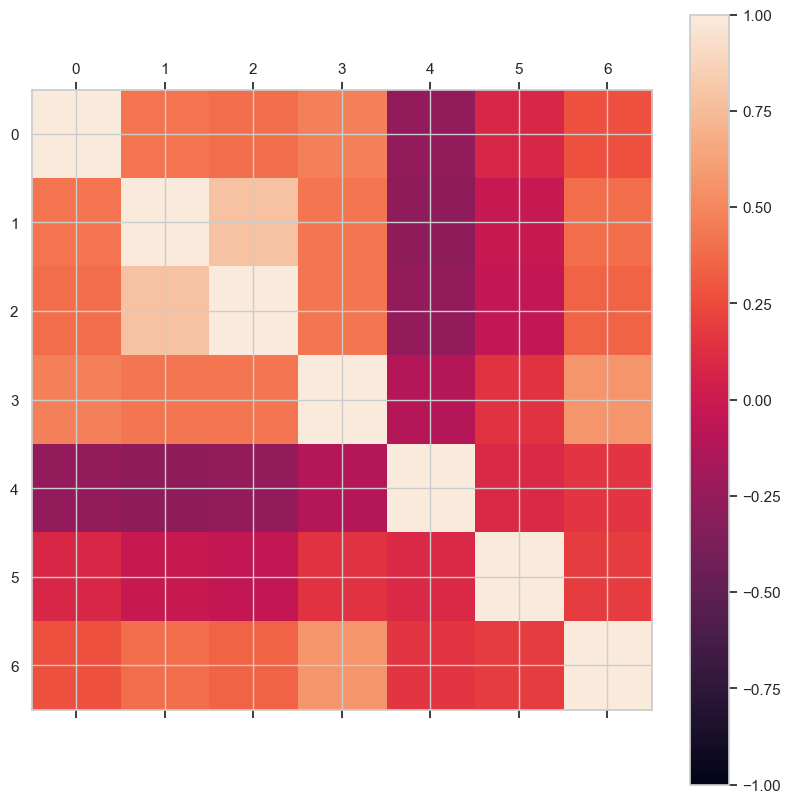

In [824]:
# Visualising the correlation matrix
fig =plt.figure(figsize=[10,10])
ax = fig.add_subplot(111)
cax = ax.matshow(correlations,vmin = -1, vmax = 1)
fig.colorbar(cax)
plt.show()
                

From the visualisation chart, it can be noted that the highest correlation between feature 3(BS) and the expected outcome item number 6. Risk Level exists between SystolicBP and the RiskLevel(0,325681), so systolic BS has the gighest likelyhood of causing maternity deaths. The heart rate however has the least impect on maternity risk(0.154731).

**The next task is to check whether the data is skewed or not using the skew() function**

In [825]:
# Determinng whether data is skewed or not
skew = maternityRiskCopy.skew(axis = 0)
skew

Age            0.783063
SystolicBP    -0.251189
DiastolicBP   -0.048441
BS             1.868203
BodyTemp       1.750988
HeartRate     -1.043525
RiskLevel      0.244556
dtype: float64

In [826]:
age_skew = maternityRiskCopy['Age'].skew()
systolicBP_skew = maternityRiskCopy['SystolicBP'].skew()
diastolicBP_skew = maternityRiskCopy['DiastolicBP'].skew()
bs_skew = maternityRiskCopy['BS'].skew()
bodyTemp_skew = maternityRiskCopy['BodyTemp'].skew()
heartRate_skew = maternityRiskCopy['HeartRate'].skew()
riskLevel_skew = maternityRiskCopy['RiskLevel'].skew()


In [827]:
#checking skew value for column 'Age'
print(f"Skew for the variable Age: {age_skew:.5f}")

Skew for the variable Age: 0.78306


In [828]:
#checking skew value for column 'SystolicBP'
print(f"Skew for the variable SystolicBP: {systolicBP_skew:.5f}")

Skew for the variable SystolicBP: -0.25119


In [829]:
#checking skew value for column 'DiastolicBP'
print(f"Skew for the variable SystolicBP: {diastolicBP_skew:.5f}")

Skew for the variable SystolicBP: -0.04844


In [830]:
#checking skew value for column 'BS'
print(f"Skew for the variable BS: {bs_skew:.5f}")

Skew for the variable BS: 1.86820


In [831]:
#checking skew value for column 'BodyTemp'
print(print(f"Skew for the variable SystolicBP: {bodyTemp_skew:.5f}"))

Skew for the variable SystolicBP: 1.75099
None


In [832]:
#checking skew value for column 'HeartRate'
print(f"Skew for the variable SystolicBP: {heartRate_skew:.5f}")

Skew for the variable SystolicBP: -1.04353


In [833]:
#checking skew value for column 'RislLevel'
print(f"Skew for the variable SystolicBP: {riskLevel_skew:.5f}")

Skew for the variable SystolicBP: 0.24456


To visualise the skewedness of the data, the data is plotted before transformation 

In [834]:
#Importing libraries for plotting the skewedness of variables
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


C:\Users\Langton\anaconda4\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Langton\anaconda4\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Langton\anaconda4\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


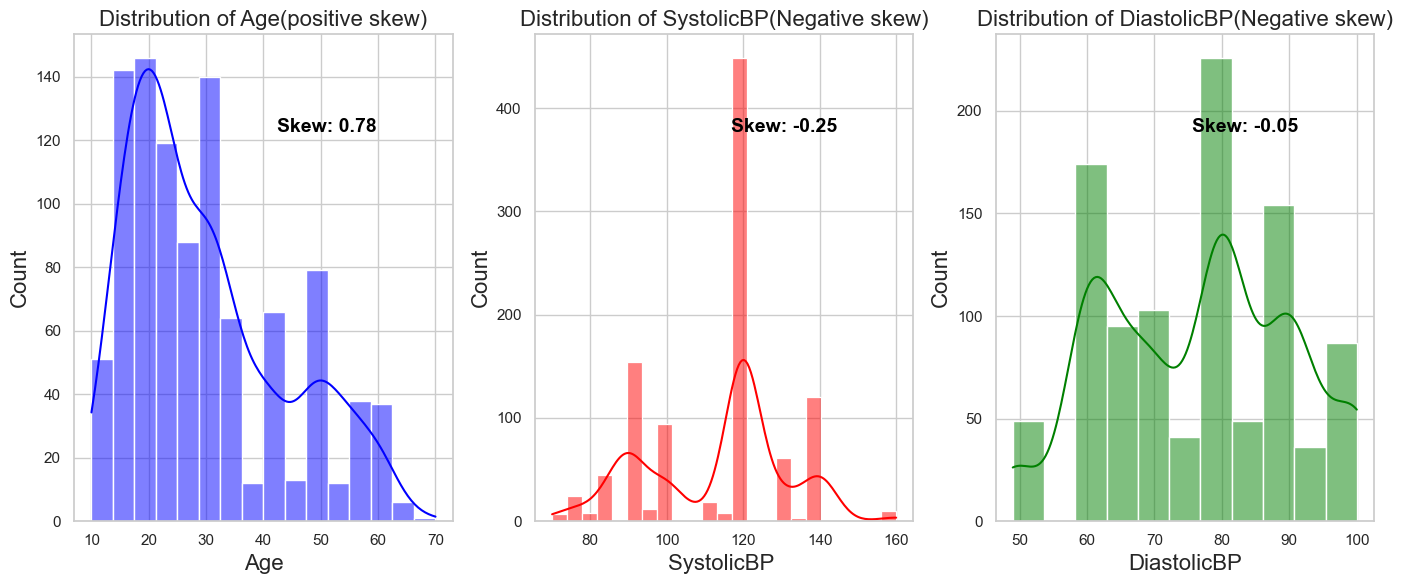

In [835]:
# setting the style of seaborn
sns.set(style = 'whitegrid')
#creating a figure for two subplots for comparison before transformation and after transformation
fig,ax = plt.subplots(1,3,figsize = (14,6))

#plot for 'Age" against 'Count'
sns.histplot(maternityRiskCopy['Age'], kde = True , ax =ax[0], color = 'Blue')
ax[0].set_title('Distribution of Age(positive skew)',fontsize = 16)
ax[0].set_xlabel('Age',fontsize = 16)
ax[0].set_ylabel('Count',fontsize = 16)

#showing the value of skewedness of Age on the histogram
ax[0].text(0.8, 0.8, f'Skew: {age_skew:.2f}', transform=ax[0].transAxes,
           horizontalalignment='right', color='black', weight='bold',
           fontsize=14)

#Plot for SystolicBP
#plot for 'SystolicBP' against 'Count'
sns.histplot(maternityRiskCopy['SystolicBP'], kde = True , ax =ax[1], color = 'Red')
ax[1].set_title('Distribution of SystolicBP(Negative skew)',fontsize = 16)
ax[1].set_xlabel('SystolicBP ',fontsize = 16)
ax[1].set_ylabel('Count',fontsize = 16)

#showing the value of skewedness on the histogram
ax[1].text(0.8, 0.8, f'Skew: {systolicBP_skew:.2f}', transform=ax[1].transAxes,
           horizontalalignment='right', color='black', weight='bold',
           fontsize=14)

#Plot for DiastolicBP
#plot for 'DiastolicBP' against 'Count'
sns.histplot(maternityRiskCopy['DiastolicBP'], kde = True , ax =ax[2], color = 'Green')
ax[2].set_title('Distribution of DiastolicBP(Negative skew)',fontsize = 16)
ax[2].set_xlabel('DiastolicBP',fontsize = 16)
ax[2].set_ylabel('Count',fontsize = 16)

#showing the value of skewedness on the histogram
ax[2].text(0.8, 0.8, f'Skew: {diastolicBP_skew:.2f}', transform=ax[2].transAxes,
           horizontalalignment='right', color='black', weight='bold',
           fontsize=14)
plt.tight_layout()
plt.show()


C:\Users\Langton\anaconda4\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Langton\anaconda4\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Langton\anaconda4\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


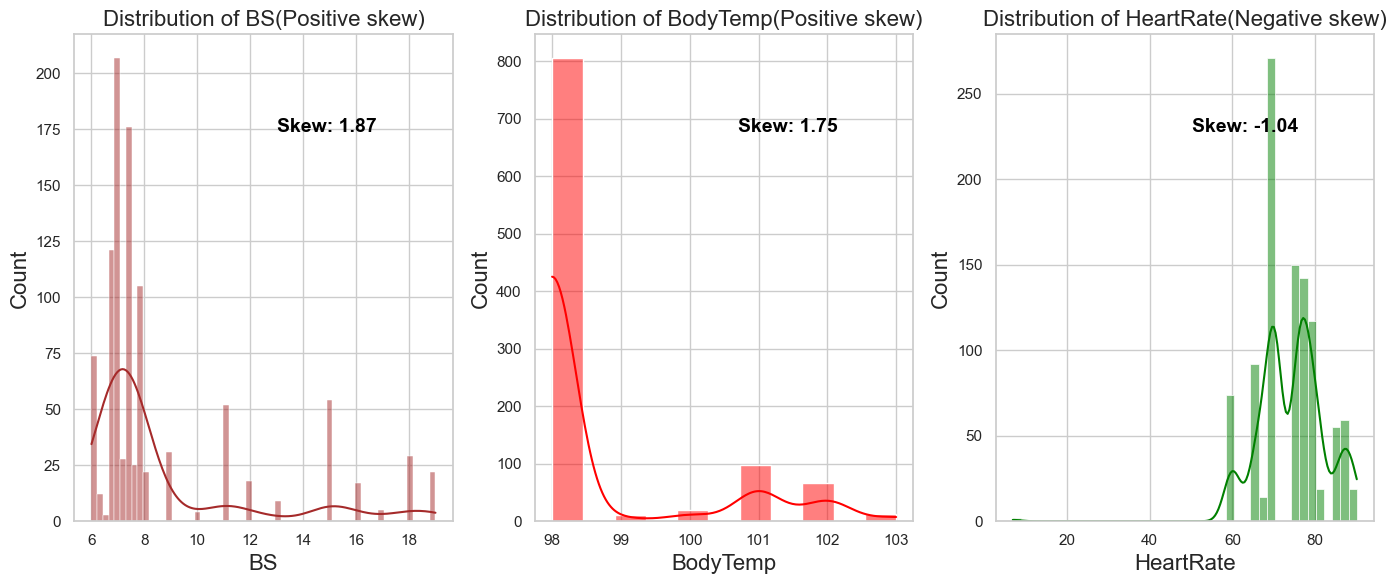

In [836]:
# setting the style of seaborn
sns.set(style = 'whitegrid')
#creating a figure for two subplots for comparison before transformation and after transformation
fig,ax = plt.subplots(1,3,figsize = (14,6))

#plot for 'BS" against 'Count'
sns.histplot(maternityRiskCopy['BS'], kde = True , ax =ax[0], color = 'Brown')
ax[0].set_title('Distribution of BS(Positive skew)',fontsize = 16)
ax[0].set_xlabel('BS',fontsize = 16)
ax[0].set_ylabel('Count',fontsize = 16)

#showing the value of skewedness on the histogram
ax[0].text(0.8, 0.8, f'Skew: {bs_skew:.2f}', transform=ax[0].transAxes,
           horizontalalignment='right', color='black', weight='bold',
           fontsize=14)

#Plot for BodyTemp
#plot for 'BodyTemp' against 'Count'
sns.histplot(maternityRiskCopy['BodyTemp'], kde = True , ax =ax[1], color = 'Red')
ax[1].set_title('Distribution of BodyTemp(Positive skew)',fontsize = 16)
ax[1].set_xlabel('BodyTemp',fontsize = 16)
ax[1].set_ylabel('Count',fontsize = 16)

#showing the value of skewedness on the histogram
ax[1].text(0.8, 0.8, f'Skew: {bodyTemp_skew:.2f}', transform=ax[1].transAxes,
           horizontalalignment='right', color='black', weight='bold',
           fontsize=14)

#Plot for HeartRate
#plot for 'HeartRate' against 'Count'
sns.histplot(maternityRiskCopy['HeartRate'], kde = True , ax =ax[2], color = 'Green')
ax[2].set_title('Distribution of HeartRate(Negative skew)',fontsize = 16)
ax[2].set_xlabel('HeartRate',fontsize = 16)
ax[2].set_ylabel('Count',fontsize = 16)

#showing the value of skewedness on the histogram
ax[2].text(0.8, 0.8, f'Skew: {heartRate_skew:.2f}', transform=ax[2].transAxes,
           horizontalalignment='right', color='black', weight='bold',
           fontsize=14)
plt.tight_layout()
plt.show()

C:\Users\Langton\anaconda4\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Langton\anaconda4\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


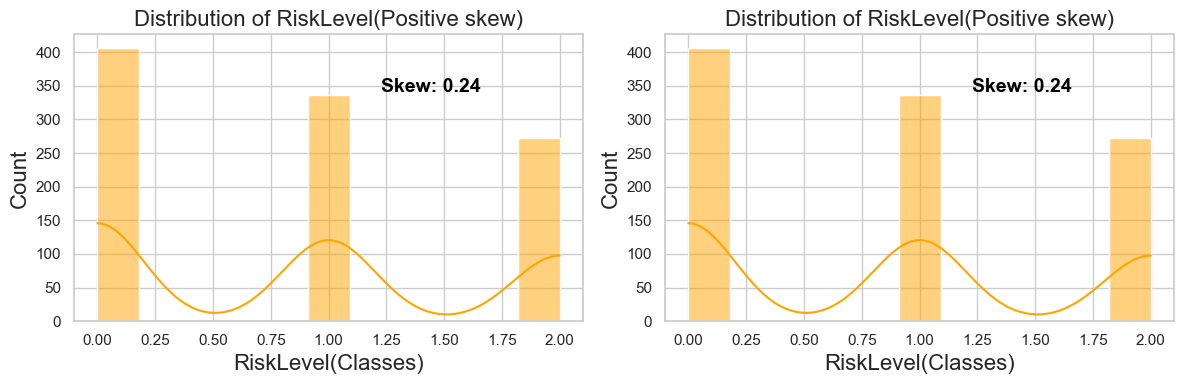

In [837]:
sns.set(style = 'whitegrid')
#creating a figure for two subplots for comparison before transformation and after transformation

fig,ax = plt.subplots(1,2,figsize = (12,4))

#plot for 'BS" against 'Count'
sns.histplot(maternityRiskCopy['RiskLevel'], kde = True , ax =ax[0], color = 'Orange')
ax[0].set_title('Distribution of RiskLevel(Positive skew)',fontsize = 16)
ax[0].set_xlabel('RiskLevel(Classes)',fontsize = 16)
ax[0].set_ylabel('Count',fontsize = 16)

#showing the value of skewedness of BP on the histogram
ax[0].text(0.8, 0.8, f'Skew: {riskLevel_skew:.2f}', transform=ax[0].transAxes,
           horizontalalignment='right', color='black', weight='bold',
           fontsize=14)

sns.histplot(maternityRiskCopy['RiskLevel'], kde = True , ax =ax[1], color = 'Orange')
ax[1].set_title('Distribution of RiskLevel(Positive skew)',fontsize = 16)
ax[1].set_xlabel('RiskLevel(Classes)',fontsize = 16)
ax[1].set_ylabel('Count',fontsize = 16)

#showing the value of skewedness on the histogram
ax[1].text(0.8, 0.8, f'Skew: {riskLevel_skew:.2f}', transform=ax[1].transAxes,
           horizontalalignment='right', color='black', weight='bold',
           fontsize=14)
plt.tight_layout()
plt.show()


The histograms show that the variables age,BS and body temperature are not normalised so normalisation is required to ensure that the skew is reduces.

Most of the data in maternityRiskCopy is skewed to the right i.e positive skew. Log trasformation is the best transform method to make the distributions normal by redusing the skew. The next task is to reduce skew by applying log transformation.

**DATA TRANSFORMATION**


The skewed data in the visualisations above needs to be transformed so that it follows a normal dostribution curve for the model to work well. Firts we rescale the data then we normalise it.

In [838]:
#reducing skew on the Age column using log transform
maternityRiskCopy['Age'] = np.log(maternityRiskCopy['Age'])
skewAgeAfter = maternityRiskCopy['Age'].skew(axis = 0)
skewAgeAfter
print(f"Skewness of Age after Log Transformation: {skewAgeAfter:.5f}")



Skewness of Age after Log Transformation: 0.11648


In [839]:
#Checking new data structure  Age after log transformation
print(maternityRiskCopy['Age'])

0       3.218876
1       3.555348
2       3.367296
3       3.401197
4       3.555348
          ...   
1009    3.091042
1010    4.007333
1011    3.555348
1012    3.761200
1013    3.465736
Name: Age, Length: 1014, dtype: float64


In [840]:
#reducing skew on the Age column using log transform
maternityRiskCopy['SystolicBP'] = np.log(maternityRiskCopy['SystolicBP'])
skewSystolicBPAfter = maternityRiskCopy['SystolicBP'].skew(axis = 0)
skewSystolicBPAfter
print(f"Skewness of SystolicBP after Log Transformation: {skewSystolicBPAfter:.5f}")


Skewness of SystolicBP after Log Transformation: -0.56295


In [841]:
print(maternityRiskCopy['SystolicBP'])

0       4.867534
1       4.941642
2       4.499810
3       4.941642
4       4.787492
          ...   
1009    4.787492
1010    4.787492
1011    4.442651
1012    4.787492
1013    4.787492
Name: SystolicBP, Length: 1014, dtype: float64


In [842]:
#reducing skew on the DiastolicBP column using log transform
maternityRisk['DiastolicBP'] = np.log(maternityRiskCopy['DiastolicBP'])
skewDiastolicBPAfter = maternityRiskCopy['DiastolicBP'].skew(axis = 0)
skewDiastolicBPAfter
print(f"Skewness of BS  after Log Transformation: {skewDiastolicBPAfter:.5f}")


Skewness of BS  after Log Transformation: -0.04844


In [843]:
#reducing skew on the BS column using log transform
maternityRiskCopy['BS'] = np.log(maternityRiskCopy['BS'])
skewBSAfter = maternityRiskCopy['BS'].skew(axis = 0)
skewBSAfter
print(f"Skewness of BS after Log Transformation: {skewBSAfter:.5f}")


Skewness of BS after Log Transformation: 1.51798


In [844]:
#reducing skew on the BodyTemp column using log transform
maternityRiskCopy['BodyTemp'] = np.log(maternityRiskCopy['BodyTemp'])
skewBodyTempAfter = maternityRiskCopy['BodyTemp'].skew(axis = 0)
skewBodyTempAfter
print(f"Skewness of BodyTemp after Log Transformation: {skewBodyTempAfter:.5f}")

Skewness of BodyTemp after Log Transformation: 1.74327


In [845]:
#reducing skew on the HeartRate column using log transform
maternityRiskCopy['HeartRate'] = np.log(maternityRiskCopy['HeartRate'])
skewHeartRateAfter = maternityRiskCopy['HeartRate'].skew(axis = 0)
skewHeartRateAfter
print(f"Skewness of HeartRate after Log Transformation: {skewHeartRateAfter:.5f}")

Skewness of HeartRate after Log Transformation: -8.31056


**Plotting the visualisations of the skew after log transformation**

C:\Users\Langton\anaconda4\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Langton\anaconda4\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Langton\anaconda4\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


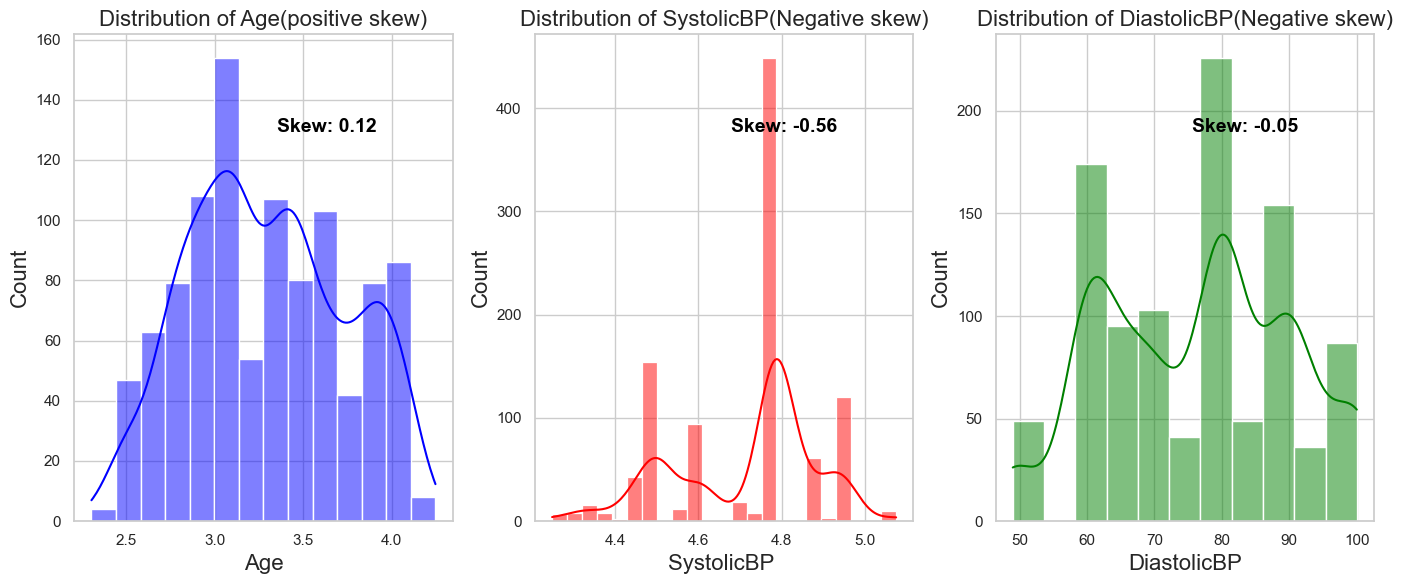

In [846]:
# setting the style of seaborn
sns.set(style = 'whitegrid')
#creating a figure for two subplots for comparison before transformation and after transformation
fig,ax = plt.subplots(1,3,figsize = (14,6))

#plot for 'Age" against 'Count'
sns.histplot(maternityRiskCopy['Age'], kde = True , ax =ax[0], color = 'Blue')
ax[0].set_title('Distribution of Age(positive skew)',fontsize = 16)
ax[0].set_xlabel('Age',fontsize = 16)
ax[0].set_ylabel('Count',fontsize = 16)

#showing the value of skewedness on the histogram after transformation
ax[0].text(0.8, 0.8, f'Skew: {skewAgeAfter:.2f}', transform=ax[0].transAxes,
           horizontalalignment='right', color='black', weight='bold',
           fontsize=14)
#Plot for SystolicBP
#plot for 'SystolicBP' against 'Count'
sns.histplot(maternityRiskCopy['SystolicBP'], kde = True , ax =ax[1], color = 'Red')
ax[1].set_title('Distribution of SystolicBP(Negative skew)',fontsize = 16)
ax[1].set_xlabel('SystolicBP ',fontsize = 16)
ax[1].set_ylabel('Count',fontsize = 16)

#showing the value of skewedness on the histogram
ax[1].text(0.8, 0.8, f'Skew: {skewSystolicBPAfter:.2f}', transform=ax[1].transAxes,
           horizontalalignment='right', color='black', weight='bold',
           fontsize=14)
#Plot for DiastolicBP after transformation
#plot for 'DiastolicBP' against 'Count'
sns.histplot(maternityRiskCopy['DiastolicBP'], kde = True , ax =ax[2], color = 'Green')
ax[2].set_title('Distribution of DiastolicBP(Negative skew)',fontsize = 16)
ax[2].set_xlabel('DiastolicBP',fontsize = 16)
ax[2].set_ylabel('Count',fontsize = 16)

#showing the value of skewedness on the histogram after transformation
ax[2].text(0.8, 0.8, f'Skew: {skewDiastolicBPAfter:.2f}', transform=ax[2].transAxes,
           horizontalalignment='right', color='black', weight='bold',
           fontsize=14)
plt.tight_layout()
plt.show()

C:\Users\Langton\anaconda4\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Langton\anaconda4\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Langton\anaconda4\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


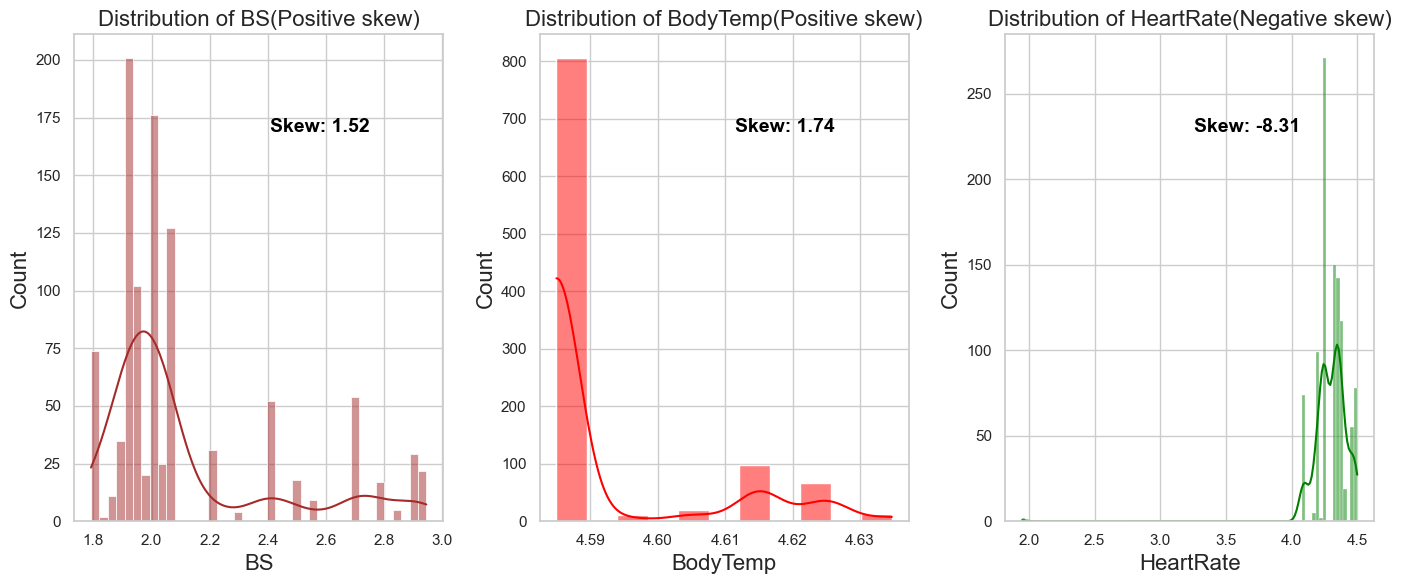

In [847]:
# setting the style of seaborn
sns.set(style = 'whitegrid')
#creating a figure for two subplots for comparison before transformation and after transformation
fig,ax = plt.subplots(1,3,figsize = (14,6))

#plot for 'BS" against 'Count'
sns.histplot(maternityRiskCopy['BS'], kde = True , ax =ax[0], color = 'Brown')
ax[0].set_title('Distribution of BS(Positive skew)',fontsize = 16)
ax[0].set_xlabel('BS',fontsize = 16)
ax[0].set_ylabel('Count',fontsize = 16)

#showing the value of skewedness on the histogram
ax[0].text(0.8, 0.8, f'Skew: {skewBSAfter:.2f}', transform=ax[0].transAxes,
           horizontalalignment='right', color='black', weight='bold',
           fontsize=14)

#Plot for BodyTemp
#plot for 'BodyTemp' against 'Count'
sns.histplot(maternityRiskCopy['BodyTemp'], kde = True , ax =ax[1], color = 'Red')
ax[1].set_title('Distribution of BodyTemp(Positive skew)',fontsize = 16)
ax[1].set_xlabel('BodyTemp',fontsize = 16)
ax[1].set_ylabel('Count',fontsize = 16)

#showing the value of skewedness on the histogram
ax[1].text(0.8, 0.8, f'Skew: {skewBodyTempAfter:.2f}', transform=ax[1].transAxes,
           horizontalalignment='right', color='black', weight='bold',
           fontsize=14)

#Plot for HeartRate
#plot for 'HeartRate' against 'Count'
sns.histplot(maternityRiskCopy['HeartRate'], kde = True , ax =ax[2], color = 'Green')
ax[2].set_title('Distribution of HeartRate(Negative skew)',fontsize = 16)
ax[2].set_xlabel('HeartRate',fontsize = 16)
ax[2].set_ylabel('Count',fontsize = 16)

#showing the value of skewedness on the histogram
ax[2].text(0.8, 0.8, f'Skew: {skewHeartRateAfter:.2f}', transform=ax[2].transAxes,
           horizontalalignment='right', color='black', weight='bold',
           fontsize=14)
plt.tight_layout()
plt.show()

It can be noticed that the skewness of the BS, Body Temeperature and Heart rate has not improved by using the log transform method. In the next section the squate root transformation is applied to the three.

In [848]:
#Applying the square root Transformation to the Age, Body Temperature and Heart rate variables
#Applying squareroot transform to Body Temperature
maternityRiskCopy['BS'] = np.sqrt(maternityRiskCopy['BS'])
skewBSAfter = maternityRiskCopy['BS'].skew(axis = 0)
skewBSAfter

1.4396705198744255

The value does not seem to change either. Another transform method, quantile trasform is tried

In [849]:
from sklearn.preprocessing import QuantileTransformer

In [850]:
# Using the quatile transform
transformer = QuantileTransformer(output_distribution='normal', random_state=0)
maternityRiskCopy['BodyTemp'] = transformer.fit_transform(maternityRiskCopy['BodyTemp'].values.reshape(-1, 1)).flatten()
skewAfterBpdyTemp = maternityRiskCopy['BodyTemp'].skew(axis = 0)
skewAfterBpdyTemp

1.573796605069766

It can be noted that the skew reduced a lot to around 1.25

In [851]:
# Using the quatile transform on the BS variable
transformer = QuantileTransformer(output_distribution='normal', random_state=0)
maternityRiskCopy['BS'] = transformer.fit_transform(maternityRiskCopy['BS'].values.reshape(-1, 1)).flatten()
skewAfterBS = maternityRiskCopy['BS'].skew(axis = 0)
skewAfterBS

0.046275007722861784

In [852]:
# Using the quatile transform on the BS variable
transformer = QuantileTransformer(output_distribution='normal', random_state=0)
maternityRiskCopy['HeartRate'] = transformer.fit_transform(maternityRiskCopy['HeartRate'].values.reshape(-1, 1)).flatten()
skewAfterHeartRate = maternityRiskCopy['HeartRate'].skew(axis = 0)
skewAfterHeartRate

1.2598030856525608

C:\Users\Langton\anaconda4\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Langton\anaconda4\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Langton\anaconda4\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


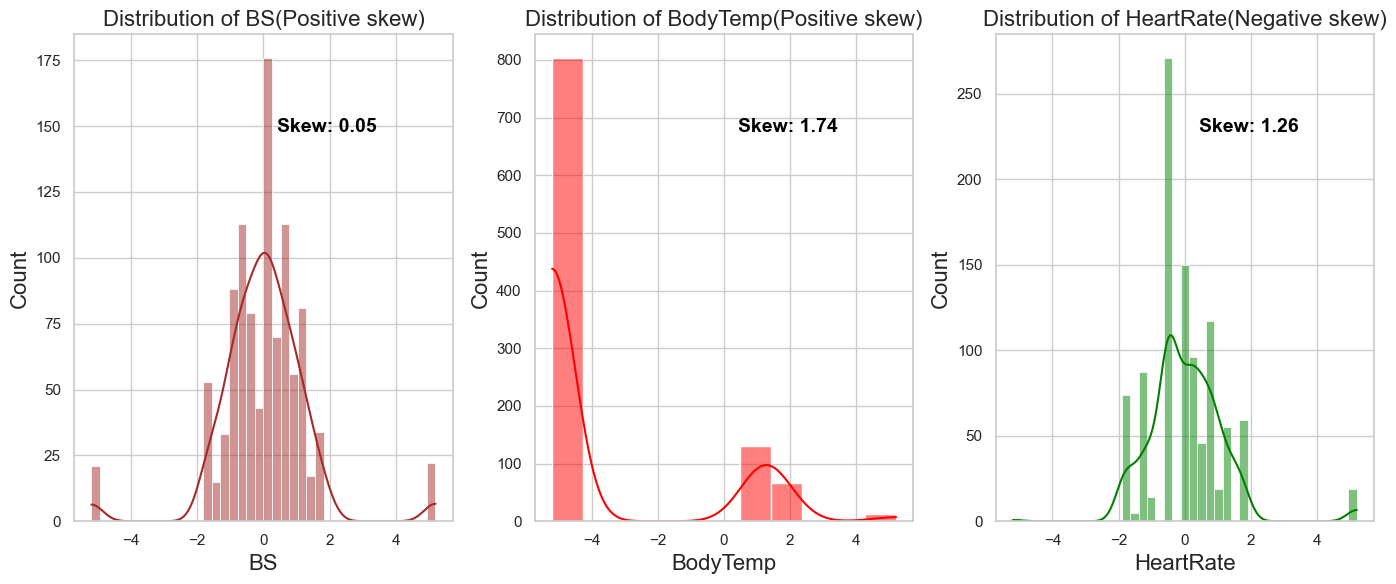

In [853]:
# setting the style of seaborn
sns.set(style = 'whitegrid')
#creating a figure for two subplots for comparison before transformation and after transformation
fig,ax = plt.subplots(1,3,figsize = (14,6))

#plot for 'BS" against 'Count'
sns.histplot(maternityRiskCopy['BS'], kde = True , ax =ax[0], color = 'Brown')
ax[0].set_title('Distribution of BS(Positive skew)',fontsize = 16)
ax[0].set_xlabel('BS',fontsize = 16)
ax[0].set_ylabel('Count',fontsize = 16)

#showing the value of skewedness on the histogram
ax[0].text(0.8, 0.8, f'Skew: {skewAfterBS:.2f}', transform=ax[0].transAxes,
           horizontalalignment='right', color='black', weight='bold',
           fontsize=14)

#Plot for BodyTemp
#plot for 'BodyTemp' against 'Count'
sns.histplot(maternityRiskCopy['BodyTemp'], kde = True , ax =ax[1], color = 'Red')
ax[1].set_title('Distribution of BodyTemp(Positive skew)',fontsize = 16)
ax[1].set_xlabel('BodyTemp',fontsize = 16)
ax[1].set_ylabel('Count',fontsize = 16)

#showing the value of skewedness on the histogram
ax[1].text(0.8, 0.8, f'Skew: {skewBodyTempAfter:.2f}', transform=ax[1].transAxes,
           horizontalalignment='right', color='black', weight='bold',
           fontsize=14)

#Plot for HeartRate
#plot for 'HeartRate' against 'Count'
sns.histplot(maternityRiskCopy['HeartRate'], kde = True , ax =ax[2], color = 'Green')
ax[2].set_title('Distribution of HeartRate(Negative skew)',fontsize = 16)
ax[2].set_xlabel('HeartRate',fontsize = 16)
ax[2].set_ylabel('Count',fontsize = 16)

#showing the value of skewedness on the histogram
ax[2].text(0.8, 0.8, f'Skew: {skewAfterHeartRate:.2f}', transform=ax[2].transAxes,
           horizontalalignment='right', color='black', weight='bold',
           fontsize=14)
plt.tight_layout()
plt.show()

**Creating visualisations for the transformed data for the variables BS, HeartRate and Body Temperature**

In [854]:
maternityRiskCopy['BodyTemp']

0      -5.199338
1      -5.199338
2       0.899534
3      -5.199338
4      -5.199338
          ...   
1009   -5.199338
1010   -5.199338
1011   -5.199338
1012   -5.199338
1013    1.147315
Name: BodyTemp, Length: 1014, dtype: float64

In [855]:
#Rescaling the data
maternityRiskCopyArray = maternityRiskCopy.values

In [856]:
#separating the array into input and output componets
X = maternityRiskCopyArray[:,0:6]
Y = maternityRiskCopyArray[:,6]

In [857]:
# Checking the arrays
X

array([[ 3.219e+00,  4.868e+00,  8.000e+01,  1.292e+00, -5.199e+00,
         1.261e+00],
       [ 3.555e+00,  4.942e+00,  9.000e+01,  1.128e+00, -5.199e+00,
        -4.879e-01],
       [ 3.367e+00,  4.500e+00,  7.000e+01,  6.800e-01,  8.995e-01,
         8.161e-01],
       ...,
       [ 3.555e+00,  4.443e+00,  6.000e+01,  5.199e+00, -5.199e+00,
         1.261e+00],
       [ 3.761e+00,  4.787e+00,  9.000e+01,  1.805e+00, -5.199e+00,
        -4.879e-01],
       [ 3.466e+00,  4.787e+00,  6.500e+01, -5.199e+00,  1.147e+00,
         7.535e-02]])

In [858]:
Y

array([2., 2., 2., ..., 2., 2., 1.])

In [859]:
#Rescaling the array data
from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler



In [860]:
maternityRiskCopyScaler = MinMaxScaler(feature_range = (0,1))
rescaledX = maternityRiskCopyScaler.fit_transform(X)

# Putting the transformed data together
set_printoptions(precision =3)


In [861]:
# checking rescaled data
rescaledX

array([[0.471, 0.749, 0.608, 0.624, 0.   , 0.621],
       [0.644, 0.838, 0.804, 0.608, 0.   , 0.453],
       [0.547, 0.304, 0.412, 0.565, 0.587, 0.578],
       ...,
       [0.644, 0.235, 0.216, 1.   , 0.   , 0.621],
       [0.75 , 0.652, 0.804, 0.674, 0.   , 0.453],
       [0.598, 0.652, 0.314, 0.   , 0.61 , 0.507]])

All values for the array are now in the range 0 to 1 after rescaling

**NORMALISING THE DATA**

In [862]:
# The data needs to follow a normal dostribution so we normalise it
from sklearn.preprocessing import Normalizer
maternityRiskCopyScaler = Normalizer().fit(X)

normalizedX = maternityRiskCopyScaler.transform(X)

#Putting the normalized data together
set_printoptions(precision = 3)
print(normalizedX[0:5, :])


[[ 0.04   0.061  0.995  0.016 -0.065  0.016]
 [ 0.039  0.055  0.996  0.012 -0.058 -0.005]
 [ 0.048  0.064  0.997  0.01   0.013  0.012]
 [ 0.04   0.058  0.996 -0.004 -0.061 -0.006]
 [ 0.059  0.079  0.991 -0.028 -0.086  0.001]]


**Checking the structure of the data set after data preparation**



In [863]:
maternityRiskCopy.shape

(1014, 7)

In [864]:
maternityRiskCopy.head(10)

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,3.218876,4.867534,80,1.292465,-5.199338,1.261282,2
1,3.555348,4.941642,90,1.128144,-5.199338,-0.487893,2
2,3.367296,4.499810,70,0.680013,0.899534,0.816150,2
3,3.401197,4.941642,85,-0.365531,-5.199338,-0.487893,2
4,3.555348,4.787492,60,-1.684464,-5.199338,0.075345,0
5,3.135494,4.941642,80,-0.243255,-5.199338,-0.487893,2
6,3.135494,4.867534,70,-0.243255,-5.199338,0.559859,1
7,3.555348,4.442651,60,0.926176,1.700222,1.261282,2
8,3.465736,4.787492,90,-0.634851,-5.199338,-0.487893,1
9,3.737670,4.867534,80,1.805023,-5.199338,-0.487893,2


In [865]:
maternityRiskCopy.tail(10)

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
1004,2.564949,4.499810,65,0.764710,1.147315,0.816150,2
1005,2.833213,4.499810,65,0.320290,5.199338,-0.949547,2
1006,2.833213,4.442651,60,-1.453280,1.700222,1.261282,2
1007,3.688879,4.787492,75,0.320290,-5.199338,-0.487893,2
1008,3.871201,4.787492,80,0.926176,-5.199338,1.674186,2
1009,3.091042,4.787492,60,1.292465,-5.199338,0.816150,2
1010,4.007333,4.787492,90,1.805023,-5.199338,-1.780005,2
1011,3.555348,4.442651,60,5.199338,-5.199338,1.261282,2
1012,3.761200,4.787492,90,1.805023,-5.199338,-0.487893,2
1013,3.465736,4.787492,65,-5.199338,1.147315,0.075345,1


In [866]:
maternityRiskCopy

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,3.218876,4.867534,80,1.292465,-5.199338,1.261282,2
1,3.555348,4.941642,90,1.128144,-5.199338,-0.487893,2
2,3.367296,4.499810,70,0.680013,0.899534,0.816150,2
3,3.401197,4.941642,85,-0.365531,-5.199338,-0.487893,2
4,3.555348,4.787492,60,-1.684464,-5.199338,0.075345,0
...,...,...,...,...,...,...,...
1009,3.091042,4.787492,60,1.292465,-5.199338,0.816150,2
1010,4.007333,4.787492,90,1.805023,-5.199338,-1.780005,2
1011,3.555348,4.442651,60,5.199338,-5.199338,1.261282,2
1012,3.761200,4.787492,90,1.805023,-5.199338,-0.487893,2


**SECTION C: FEATURE SELECTION**

By inspection,it can be concluded that The data will use all features given their correlation to the target variable as shown in the correlations matrix and the statistical data values like the stadard deviation and as described below.Feature selection methods like filter and wrapper methods are used to confirm the observation in a more empirical sense.

In [870]:
#Correlations matrix as a basis for feture selection based on correlations
correlations

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
Age,1.000000,0.416045,0.398026,0.473284,-0.255323,0.079798,0.267225
SystolicBP,0.416045,1.000000,0.787006,0.425172,-0.286616,-0.023108,0.396473
DiastolicBP,0.398026,0.787006,1.000000,0.423824,-0.257538,-0.046151,0.346649
BS,0.473284,0.425172,0.423824,1.000000,-0.103493,0.142867,0.569942
BodyTemp,-0.255323,-0.286616,-0.257538,-0.103493,1.000000,0.098771,0.163984
HeartRate,0.079798,-0.023108,-0.046151,0.142867,0.098771,1.000000,0.194312
RiskLevel,0.267225,0.396473,0.346649,0.569942,0.163984,0.194312,1.000000


In [871]:
#Correlations matrix as a basis for feture selection based on statistical data
maternityRiskCopy.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,3.298905,4.715123,76.460552,0.004226,-3.805842,0.054632,0.867850
std,0.442566,0.170341,13.885796,1.373839,2.764885,1.169456,0.807353
min,2.302585,4.248495,49.000000,-5.199338,-5.199338,-5.199338,0.000000
25%,2.944439,4.605170,65.000000,-0.634851,-5.199338,-0.487893,0.000000
50%,3.258097,4.787492,80.000000,0.064027,-5.199338,0.075345,1.000000
75%,3.663562,4.787492,90.000000,0.680013,-5.199338,0.816150,2.000000
max,4.248495,5.075174,100.000000,5.199338,5.199338,5.199338,2.000000


In [879]:
# Feature selection using univariate selectio 
# Determining the variance
#importig libraries

from sklearn.feature_selection import VarianceThreshold
threshold_t = 0.95

selected = VarianceThreshold(threshold = (threshold_t *(1-threshold_t)))
vn = selected.fit(X)
print(vn)



VarianceThreshold(threshold=0.04750000000000004)


In [882]:
#printing features that were above the threshold
print(X[:, vn.variances_>threshold_t])

[[ 8.000e+01  1.292e+00 -5.199e+00  1.261e+00]
 [ 9.000e+01  1.128e+00 -5.199e+00 -4.879e-01]
 [ 7.000e+01  6.800e-01  8.995e-01  8.161e-01]
 ...
 [ 6.000e+01  5.199e+00 -5.199e+00  1.261e+00]
 [ 9.000e+01  1.805e+00 -5.199e+00 -4.879e-01]
 [ 6.500e+01 -5.199e+00  1.147e+00  7.535e-02]]


In [885]:
# Return the index of the features that were retained
identified = np.where(vn.variances_> threshold_t)[0]
print(identified)

[2 3 4 5]


In [888]:
# masking selected features
mask = vn.variances_ > threshold_t
print(mask)

[False False  True  True  True  True]


The selected features are 'DiastolicBP','BS','BodyTemp' and 'HeartRate'

**Using chi-squared test to confirm the features selected by the variance method**

In [917]:
# importing libraries
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# extracting features
test = SelectKBest(score_func = chi2, k = 4)
fit = test.fit((X>0),Y)

#Presenting the output scores from the test
set_printoptions(precision = 3)
print(fit.scores_)

features = fit.transform(X)

#Summarising selected features

print(features[0:6,:])


[1.610e-26 1.610e-26 1.610e-26 5.851e+01 2.728e+01 8.608e+00]
[[ 8.000e+01  1.292e+00 -5.199e+00  1.261e+00]
 [ 9.000e+01  1.128e+00 -5.199e+00 -4.879e-01]
 [ 7.000e+01  6.800e-01  8.995e-01  8.161e-01]
 [ 8.500e+01 -3.655e-01 -5.199e+00 -4.879e-01]
 [ 6.000e+01 -1.684e+00 -5.199e+00  7.535e-02]
 [ 8.000e+01 -2.433e-01 -5.199e+00 -4.879e-01]]


In [ ]:
Features DiastolicBP,BS,BodyTemp and HeartRate have the highest score hence are selected.

**Reducing data using Principal Component Analysis**

Using a wapper method to eliminate features that have littel contribution to the prediction using recursive feature elimination

In [938]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# extrating features

model = LogisticRegression(solver = 'liblinear')

rfe = RFE(model)
fit = rfe.fit(X,Y)

print("Number of features %d" % fit.n_features_)
print("The feature label is:%s" % maternityRiskCopy[:6])
print("The selected feature is: %s" % fit.support_)
print("Feature Ranking: %s"% fit.ranking_)


Number of features 3
The feature label is:        Age  SystolicBP  DiastolicBP        BS  BodyTemp  HeartRate  RiskLevel
0  3.218876    4.867534           80  1.292465 -5.199338   1.261282          2
1  3.555348    4.941642           90  1.128144 -5.199338  -0.487893          2
2  3.367296    4.499810           70  0.680013  0.899534   0.816150          2
3  3.401197    4.941642           85 -0.365531 -5.199338  -0.487893          2
4  3.555348    4.787492           60 -1.684464 -5.199338   0.075345          0
5  3.135494    4.941642           80 -0.243255 -5.199338  -0.487893          2
The selected feature is: [False  True False  True False  True]
Feature Ranking: [2 1 4 1 3 1]


The wrappermethod selected the features SystolicBP,BS and HeartRate. So by inspection the writer chose to go by the results of the variance test

Dropping irrelevant features form the dataset

In [939]:
#Displaying the original data set before dropping features
maternityRiskCopy

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,3.218876,4.867534,80,1.292465,-5.199338,1.261282,2
1,3.555348,4.941642,90,1.128144,-5.199338,-0.487893,2
2,3.367296,4.499810,70,0.680013,0.899534,0.816150,2
3,3.401197,4.941642,85,-0.365531,-5.199338,-0.487893,2
4,3.555348,4.787492,60,-1.684464,-5.199338,0.075345,0
...,...,...,...,...,...,...,...
1009,3.091042,4.787492,60,1.292465,-5.199338,0.816150,2
1010,4.007333,4.787492,90,1.805023,-5.199338,-1.780005,2
1011,3.555348,4.442651,60,5.199338,-5.199338,1.261282,2
1012,3.761200,4.787492,90,1.805023,-5.199338,-0.487893,2


In [950]:
maternityRiskCopy1 = maternityRiskCopy.drop(["Age","SystolicBP"],axis= 1)

In [951]:
# Confirming the dropped columns
maternityRiskCopy1

,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,80,1.292465,-5.199338,1.261282,2
1,90,1.128144,-5.199338,-0.487893,2
2,70,0.680013,0.899534,0.816150,2
3,85,-0.365531,-5.199338,-0.487893,2
4,60,-1.684464,-5.199338,0.075345,0
...,...,...,...,...,...
1009,60,1.292465,-5.199338,0.816150,2
1010,90,1.805023,-5.199338,-1.780005,2
1011,60,5.199338,-5.199338,1.261282,2
1012,90,1.805023,-5.199338,-0.487893,2


In [952]:
#inspecting the reduced data set
maternityRiskCopy1.head(10)

,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,80,1.292465,-5.199338,1.261282,2
1,90,1.128144,-5.199338,-0.487893,2
2,70,0.680013,0.899534,0.816150,2
3,85,-0.365531,-5.199338,-0.487893,2
4,60,-1.684464,-5.199338,0.075345,0
5,80,-0.243255,-5.199338,-0.487893,2
6,70,-0.243255,-5.199338,0.559859,1
7,60,0.926176,1.700222,1.261282,2
8,90,-0.634851,-5.199338,-0.487893,1
9,80,1.805023,-5.199338,-0.487893,2


**MODEL SELECTION**

In this section, three models will be implemented on a preprocessed data set. Since this is a classification problem,and the values are provided, making it a supervised problem, candidate methods are Decision trees, Random forests and K-nearest neighbors(KNN).

**About the models**

The Decision Tree Model
Decision Tree model is an easy to use model that predicts the outcome of a prediction using the conecpts of entropy and information gain aas well as the gini impurity. In our problem, the aim is to predict the effect of maternity risks. The result is classified as either high risk, low risk or medium risk. Decision tree algorithms are ideal and in this case we can apply the model on the raw original subset since Decision Tree algorithms have in-built data cleaning functionalities.

Random forests algorithm
This is a method that aggregates decision trees to form an ensemble. A majority vote will yeild the predicted class as the samples are collected and replaced, a method called bagging. The training set or bootstrap sample is drawn randomly from a training set , with replcement. This method is ideal in our case

k-nearest neighbors(KNN)
This model uses proximity to make classification or prediction. In our problem we need to predict the aoutcome of maternity risks as either high risk, medium risk or low risk. KNN is therefore ideal as it approximates an input to its closest estimate in a class.


**Comparing the models using KFold Cross validation**

In [983]:
# exploring the X data
X = maternityRiskCopy1.iloc[:,0:4]

In [984]:
X

,DiastolicBP,BS,BodyTemp,HeartRate
0,80,1.292465,-5.199338,1.261282
1,90,1.128144,-5.199338,-0.487893
2,70,0.680013,0.899534,0.816150
3,85,-0.365531,-5.199338,-0.487893
4,60,-1.684464,-5.199338,0.075345
...,...,...,...,...
1009,60,1.292465,-5.199338,0.816150
1010,90,1.805023,-5.199338,-1.780005
1011,60,5.199338,-5.199338,1.261282
1012,90,1.805023,-5.199338,-0.487893


In [987]:
Exploring the target data (Y)
Y = maternityRiskCopy1.iloc[:,4]

In [989]:
Y

array([2., 2., 2., ..., 2., 2., 1.])

**Slitting data into training and testing sets**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = seed, test_size = 0.33)

In [1082]:
#Exploring the training and tesing data sets

#exploring X_train data
X_train

,DiastolicBP,BS,BodyTemp,HeartRate
191,65,-1.684464,5.199338,-0.949547
454,80,-0.979511,-5.199338,-0.487893
743,80,-1.261282,-5.199338,-0.487893
950,80,0.064027,-5.199338,-0.487893
132,100,0.064027,-5.199338,-1.164444
...,...,...,...,...
579,80,0.064027,-5.199338,-0.487893
502,90,1.292465,-5.199338,5.199338
537,75,0.064027,-5.199338,-1.164444
196,60,-1.684464,-5.199338,0.075345


In [1003]:
#exploring X_test data
X_test

,DiastolicBP,BS,BodyTemp,HeartRate
113,100,1.292465,-5.199338,-0.487893
796,70,-0.979511,-5.199338,0.559859
712,80,-0.634851,1.700222,0.075345
510,63,0.064027,1.147315,-0.487893
492,70,0.556927,-5.199338,0.559859
...,...,...,...,...
239,90,1.068522,1.147315,0.816150
525,80,0.064027,-5.199338,-0.487893
846,90,-0.365531,-5.199338,1.079690
192,60,0.680013,1.147315,1.261282


In [1004]:
#exploring y_train data
y_train

191    2
454    1
743    1
950    0
132    2
      ..
579    0
502    2
537    0
196    1
175    0
Name: RiskLevel, Length: 679, dtype: int64

In [1005]:
#exploring y_test data
y_test

113    2
796    1
712    1
510    0
492    1
      ..
239    2
525    0
846    1
192    2
485    0
Name: RiskLevel, Length: 335, dtype: int64

In [1072]:
#Testing the Decison Tree classifier model

#Importing libraries for data slit

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

test_size = 0.33
seed = 7

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = seed, test_size = 0.33)

dtc = DecisionTreeClassifier(random_state = 1)

dtc.fit(X_train,y_train)

rs = dtc.score(X_test,y_test)

print("Accuracy: %.3f%%" % (rs*100.0))

Accuracy: 79.104%


In [1071]:
#Randomforest classifier

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

test_size = 0.33
seed = 7

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = seed, test_size = 0.33)

clf = RandomForestClassifier()

clf.fit(X_train,y_train)

rslt = clf.score(X_test,y_test)

print("Accuracy: %.3f%%" % (rslt*100.0))

Accuracy: 80.896%


In [1074]:
#Randomforest classifier

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

test_size = 0.33
seed = 7

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = seed, test_size = 0.33)

knb = KNeighborsClassifier()

knb.fit(X_train,y_train)

reslt = knb.score(X_test,y_test)

print("Accuracy: %.3f%%" % (reslt*100.0))

Accuracy: 65.373%


The results of the models on the data show that the KNN classifoer is 65.373% accurate, The RandomRorest classfier is 80.896% accurate and the DecisionTree classifier is 79.104% accurate. So the model to use is the RandomForest classifier.  

**Testing the models using KFold cross-validation**

In [1097]:
#Comparing model performance using the KFold cross validation

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

num_folds = 10
seed = 7
kfold = KFold(n_splits = num_folds, random_state = seed, shuffle = True)

model1 = DecisionTreeClassifier(random_state = 1)
model2 = RandomForestClassifier()
model3 = KNeighborsClassifier()

result1 = cross_val_score(model1,X,y, cv = kfold)
result2 = cross_val_score(model2,X,y, cv = kfold)
result3 = cross_val_score(model3,X,y, cv = kfold)

print("Accuracy of the DecisionTreeClassifier: %.3f%% (%.3f%%)" % (result1.mean()*100.0,results.std()*100.0))
print("Accuracy of the RandomForestClassifier: %.3f%% (%.3f%%)" % (result2.mean()*100.0,results.std()*100.0))
print("Accuracy of the KNeighborsClassifier: %.3f%% (%.3f%%)" % (result3.mean()*100.0,results.std()*100.0))



Accuracy of the DecisionTreeClassifier: 79.189% (4.898%)
Accuracy of the RandomForestClassifier: 79.977% (4.898%)
Accuracy of the KNeighborsClassifier: 68.142% (4.898%)


From the KFold validation tests, it can be observed that the RandomForest Classfier model has a more superior accuracy althouh and the standard deviation is uniform across the models. The model of choice, therefore, is the RandomForest Classifier.

**Implementing the Random Forest Classifier model on the data to make predictions**

We realise that some of the steps have been implemented in tasks above but these will be repeated in this section for completeness in terms of the full implementation of the RandomForestClassifier.

In [1117]:
#importing necessary packages
import numpy as np
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns



In [1107]:
#splitting the data file maternityRiskCopy1 that was pre-processed into test and train variables
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = seed, test_size = 0.33)

In [1108]:
#Exploring the train and test data variables
X_train

,DiastolicBP,BS,BodyTemp,HeartRate
191,65,-1.684464,5.199338,-0.949547
454,80,-0.979511,-5.199338,-0.487893
743,80,-1.261282,-5.199338,-0.487893
950,80,0.064027,-5.199338,-0.487893
132,100,0.064027,-5.199338,-1.164444
...,...,...,...,...
579,80,0.064027,-5.199338,-0.487893
502,90,1.292465,-5.199338,5.199338
537,75,0.064027,-5.199338,-1.164444
196,60,-1.684464,-5.199338,0.075345


In [1109]:
X_test

,DiastolicBP,BS,BodyTemp,HeartRate
113,100,1.292465,-5.199338,-0.487893
796,70,-0.979511,-5.199338,0.559859
712,80,-0.634851,1.700222,0.075345
510,63,0.064027,1.147315,-0.487893
492,70,0.556927,-5.199338,0.559859
...,...,...,...,...
239,90,1.068522,1.147315,0.816150
525,80,0.064027,-5.199338,-0.487893
846,90,-0.365531,-5.199338,1.079690
192,60,0.680013,1.147315,1.261282


In [1111]:
y_train

191    2
454    1
743    1
950    0
132    2
      ..
579    0
502    2
537    0
196    1
175    0
Name: RiskLevel, Length: 679, dtype: int64

In [1112]:
y_test

113    2
796    1
712    1
510    0
492    1
      ..
239    2
525    0
846    1
192    2
485    0
Name: RiskLevel, Length: 335, dtype: int64

In [1113]:
#importing the model
from sklearn.ensemble import RandomForestClassifier

In [1118]:
#fitting the model on trainig data
rf = RandomForestClassifier(criterion ="gini",max_depth = 8, min_samples_split = 10, random_state = 7 )
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=8, min_samples_split=10, random_state=7)

In [1119]:
#Checking feature importance in the data
rf.feature_importances_

array([0.21 , 0.524, 0.104, 0.162])

In [1120]:
#Displaying feature names to match with the values
maternityRiskCopy1.columns

Index(['DiastolicBP', 'BS', 'BodyTemp', 'HeartRate', 'RiskLevel'], dtype='object')

The outcome of feature importance shows that BodyTemp,BS,HeartRate,and BodyTemp is the descending order of importance of the features

In [1123]:
#Prediction of results
y_predict = rf.predict(X_test)
y_predict

array([2, 1, 1, 0, 1, 1, 2, 1, 1, 2, 0, 0, 1, 0, 2, 1, 1, 0, 0, 1, 0, 1,
       2, 0, 1, 0, 1, 0, 2, 0, 0, 2, 0, 2, 0, 2, 0, 1, 1, 0, 1, 0, 0, 2,
       0, 1, 1, 1, 0, 2, 0, 1, 1, 0, 0, 2, 1, 0, 0, 2, 2, 2, 0, 1, 0, 2,
       0, 0, 2, 2, 1, 0, 2, 1, 1, 0, 2, 1, 2, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       2, 0, 0, 0, 2, 2, 1, 1, 2, 2, 2, 1, 0, 0, 0, 0, 2, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 2, 2, 0, 2, 2, 0, 0, 2, 0, 2, 0, 0, 0, 1, 2, 1, 0, 0,
       2, 2, 1, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 2, 0, 2, 0, 1, 0, 2, 0,
       0, 0, 2, 1, 2, 0, 2, 2, 1, 2, 2, 0, 0, 2, 0, 2, 0, 2, 1, 0, 0, 2,
       0, 2, 2, 0, 0, 0, 1, 2, 1, 0, 2, 0, 0, 1, 0, 2, 2, 0, 1, 0, 1, 0,
       0, 1, 0, 2, 0, 2, 0, 1, 2, 2, 1, 2, 1, 0, 0, 2, 0, 2, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 2, 2, 0, 2, 2, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 2, 0, 1, 0, 1, 2, 0, 2, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 2, 1, 0, 1, 1, 1, 2, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 2,
       1, 0, 1, 1, 2, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1,

To better visualise the predictions and how accurately they were predicted, a confusion matrix is used on test  and prediction datadata as follows;

**EVALUATING THE MODEL**

In [1127]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_predict)

array([[112,  20,   2],
       [ 34,  65,  15],
       [  5,   7,  75]], dtype=int64)

The matrix shows that the values in the diagonal facing left are correctly predicted while those in the diagonal facing right are incorrectly predicted.The accuracy of the model is fairly good given that there are more correct predictions than incorrect ones.

In [1130]:
#Determining the accuracy of the model
from sklearn.metrics import accuracy_score

In [1132]:
ac = accuracy_score(y_test, y_predict)
print("Accuracy of the model is: %.3f%%" % (ac*100.0))

Accuracy of the model is: 75.224%


In [1133]:
# checking the cross value score for the model for cross validation
from sklearn.model_selection import cross_val_score
cross_val_score(rf,X_train,y_train,cv=15)

array([0.696, 0.674, 0.783, 0.63 , 0.689, 0.667, 0.8  , 0.6  , 0.822,
       0.667, 0.711, 0.733, 0.622, 0.756, 0.711])

The cross validation data shows that the accuracy has a maximum of 80% and a minimum of 60%.

In [1137]:
#Displaying the classification repor
from sklearn.metrics import classification_report
print(classification_report(y_predict,y_test))

              precision    recall  f1-score   support

           0       0.84      0.74      0.79       151
           1       0.57      0.71      0.63        92
           2       0.86      0.82      0.84        92

    accuracy                           0.75       335
   macro avg       0.76      0.75      0.75       335
weighted avg       0.77      0.75      0.76       335



From the classification report, Precision shows positive identifications.We note that for the 0 class, the precision was high. This means that the model prodicts the low maternity risk very well. For the medium risk the precision is a bit low but the prediction for High Risk are fairly more precise given the highest precision of 86%.The recall shows the number of false negatives and its fairly high acroos all classes showing that our model has few false negatives. The Recall column shows the actualpositive predictions. The score is fairly high showing that our model performed pretty well. The averages are also pretty fair showing that our model predicted the outcomes pretty fairly. The accuracy is 75% which is also fairly good.